<a href="https://colab.research.google.com/github/2492dfd/2492dfd/blob/main/%5BAI2025%5D_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [TODO]

## Mall custermer data

There is information on the customer's gender, age, and annual revenue, and spending score filled with scores from 1 to 100 on the purchase amount.

In [7]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/wonseok-hong/DAP_TA/main/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


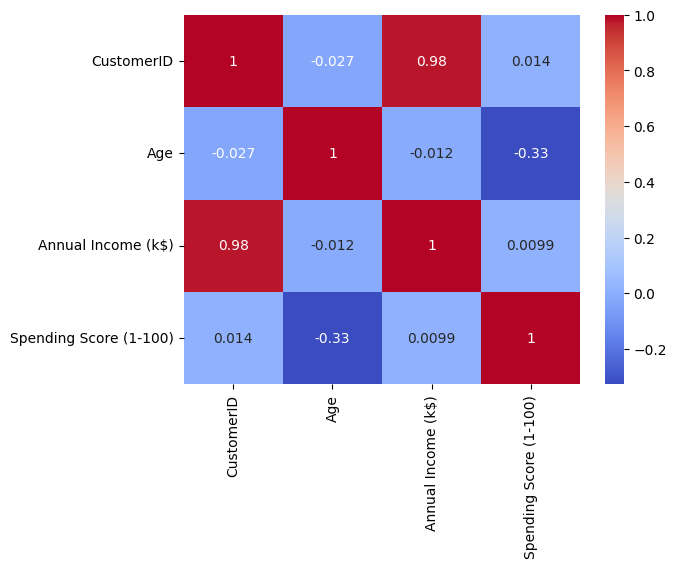

In [10]:
# Select Numeric Values
import seaborn as sns
import matplotlib.pyplot as plt
df = df.select_dtypes(include=['int64', 'float64'])

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

plt.show()

##Data Preprocessing

We will choose Annual Income (k$), Spending Score (1-100), and Z-score Scaling (by sklearn.preprocessing.StandardScaler)

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Choosing
data =df

# Scaling
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

data.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,-1.723412,-1.424569,-1.738999,-0.434801
1,-1.706091,-1.281035,-1.738999,1.195704
2,-1.688771,-1.352802,-1.700830,-1.715913
3,-1.671450,-1.137502,-1.700830,1.040418
4,-1.654129,-0.563369,-1.662660,-0.395980


## Elbow analysis with K-MEANS

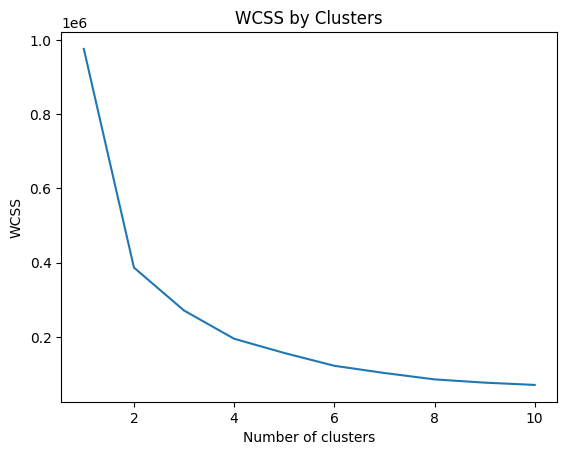

In [12]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

# Create 10 models with 1 to 10 clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)

    # Fit the data points
    kmeans.fit(df)

    # Get the WCSS (inertia) value
    wcss.append(kmeans.inertia_)

#Plot the WCSS values onto a line graph
plt.plot(range(1, 11), wcss)
plt.title('WCSS by Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### K-means fitting
- n_clusters = k
- random_state = 0


In [13]:
from sklearn.cluster import KMeans

k = 3

model =KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)

# fitting
model.fit(df)

# predicting
pred = model.predict(df)

df['cluster'] = pred

### Scatter Plot with Cluster Color

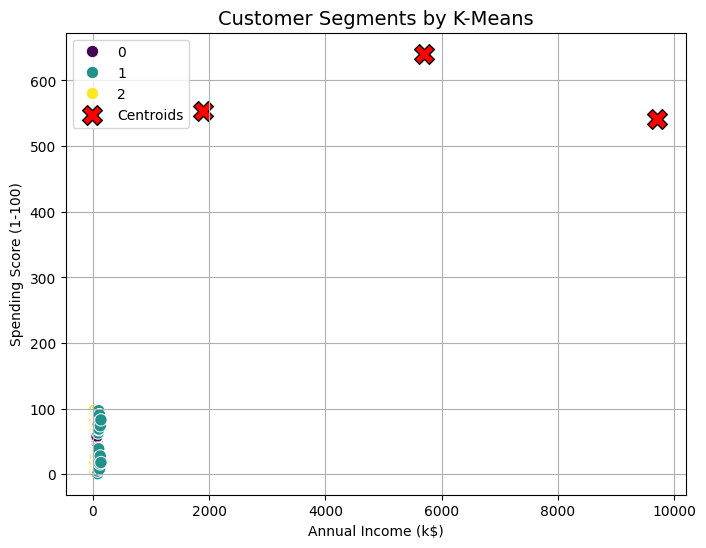

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns


# Scatterplot
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='cluster',            # Divide Cluster Color
    palette='viridis',
    data=df,                  # restoring scale : df
    s=80                      # Dot size
)

# Spotting Cluster Centroids (restoring original location before z-score)
centers_original = scaler.inverse_transform(model.cluster_centers_)
plt.scatter(
    centers_original[:, 0], centers_original[:, 1],
    c='red', s=200, marker='X', edgecolor='black', label='Centroids'
)

plt.title('Customer Segments by K-Means', fontsize=14)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

### Dendrogram

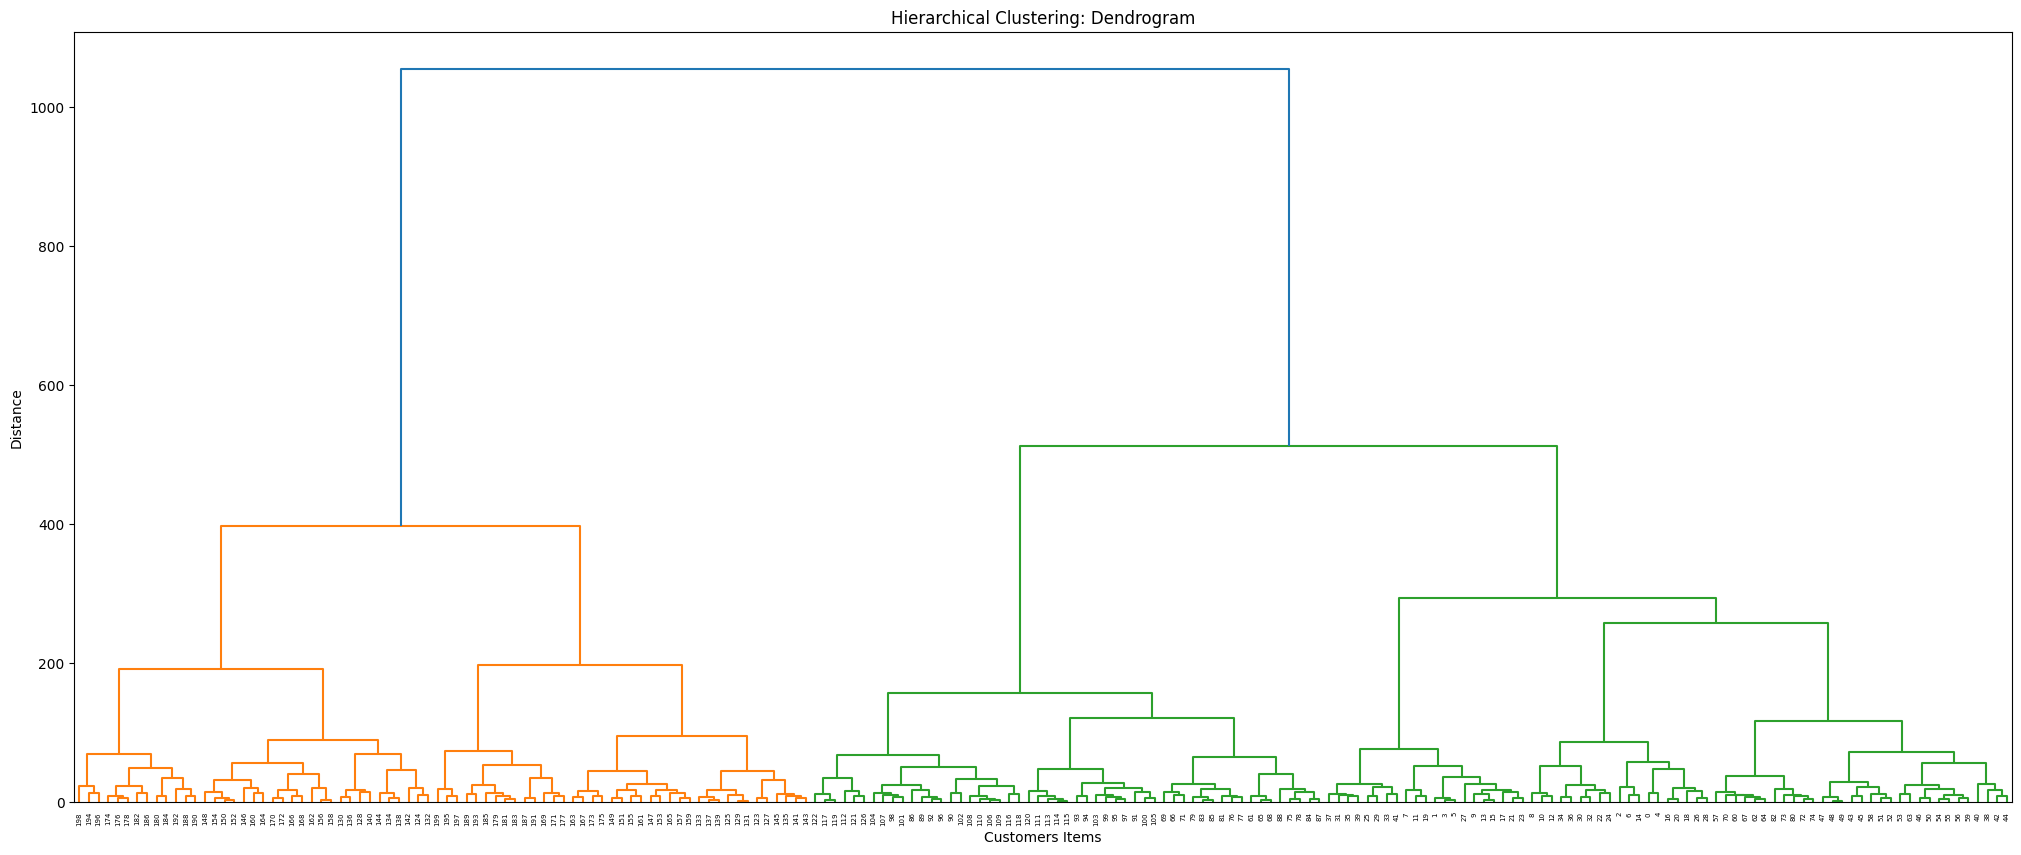

In [16]:
# Import dendrogram
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage

# create dendrogram using ward linkage
Z = linkage(df, method='ward')

fig = plt.figure(figsize=(25, 10))
dendrogram(Z ,color_threshold=Z[:,2].max()/2) # threshold is set by half of max value

# Set title of the plot
plt.title('Hierarchical Clustering: Dendrogram')
plt.xlabel('Customers Items')
plt.ylabel('Distance')
plt.show()

### Silhouette Score

In [17]:
from sklearn.metrics import silhouette_score

print("Silhouette Coefficient:", silhouette_score(data, pred))

Silhouette Coefficient: 0.2100492158319015
